1. Input Points

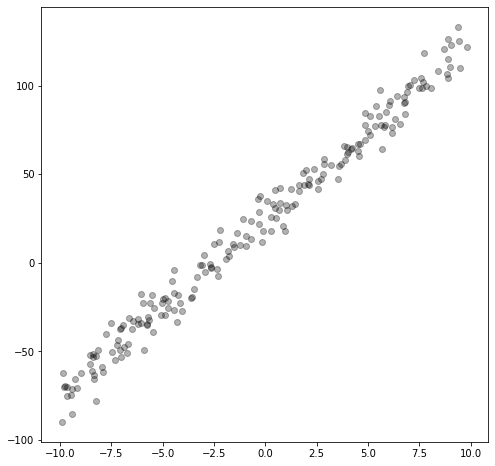

In [5]:
import numpy as np
import matplotlib.pyplot as plt

path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:,0]
y_data = data[:,1]

plt.figure(figsize=(8,8))
plt.scatter(x_data,y_data,alpha=0.3,color='black')
plt.show()

2. Linear Regression Result

24.90739329394621
9.934635539221306


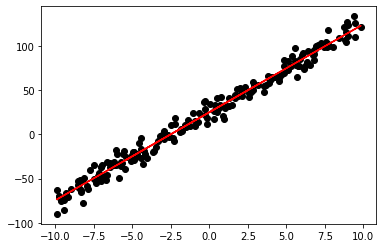

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def costFunction(hypothesis, m, y_data, theta0, theta1):
    j = np.sum((hypothesis - y_data) ** 2) / (2 * m)
    return j

def gradientDescent(hypothesis, m, x_data, y_data, theta0, theta1, a):
    for i in range(0,1000000):
        j = costFunction(hypothesis, m, y_data, theta0, theta1)
        tmp0 = theta0 - a * np.sum(hypothesis - y_data) / m
        tmp1 = theta1 - a * np.sum((hypothesis - y_data) * x_data) / m
        theta0 = tmp0
        theta1 = tmp1
        hypothesis = theta1 * x_data + theta0
        
    return (theta0, theta1, j)
    
path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:,0]
y_data =data[:,1]


t0 = 1
t1 = 1
a = 0.001
m = len(x_data)
hx = t0 + t1 * x_data

theta0, theta1, j = gradientDescent(hx, m, x_data, y_data, t0, t1, a)
hx = theta0 + theta1 * x_data

print(theta0)
print(theta1)
plt.scatter(x_data, y_data, color="black")
plt.plot(x_data,hx, color="red")
plt.show()




3. Plot the energy surface

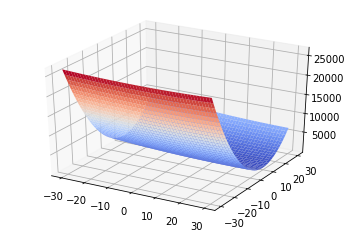

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def costFunction(hypothesis, m, y_data, theta0, theta1):
    j = np.sum((hypothesis - y_data) ** 2) / (2 * m)
    return j

def gradientDescent(hypothesis, m, x_data, y_data, theta0, theta1, a):
    for i in range(0,100000):
        j = costFunction(hypothesis, m, y_data, theta0, theta1)
        tmp0 = theta0 - a * np.sum(hypothesis - y_data) / m
        tmp1 = theta1 - a * np.sum((hypothesis - y_data) * x_data) / m
        theta0 = tmp0
        theta1 = tmp1
        hypothesis = theta1 * x_data + theta0
        
    return (theta0, theta1, j)
    
path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:,0]
y_data =data[:,1]


t0 = 1
t1 = 1
a = 0.001
m = len(x_data)
hx = t0 + t1 * x_data

theta0, theta1, j = gradientDescent(hx, m, x_data, y_data, t0, t1, a)
hx = theta0 + theta1 * x_data

fig = plt.figure()
ax = fig.gca(projection='3d')

x = np.arange(-30, 30, 0.1)
y = np.arange(-30, 30, 0.1)

theta0, theta1 = np.meshgrid(x,y)
e = np.zeros(shape = (len(theta0), len(theta1)))

for i in range(len(theta0)):
    for j in range(len(theta1)):
        hypothesis = theta1[i][j] * x_data + theta0[i][j]
        e[i][j] = np.sum((hypothesis-y_data)**2)/(2*m)

surf = ax.plot_surface(theta0,theta1,e,cmap=cm.coolwarm)
plt.show()


4. Plot the gradient descent path on the energy surface

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def costFunction(hypothesis, m, y_data, theta0, theta1):
    j = np.sum((hypothesis - y_data) ** 2) / (2 * m)
    return j

def gradientDescent(hypothesis, m, x_data, y_data, theta0, theta1, a, theta0s, theta1s,js):
    for i in range(0,1000000):
        j = costFunction(hypothesis, m, y_data, theta0, theta1)
        js.append(j)
        tmp0 = theta0 - a * np.sum(hypothesis - y_data) / m
        tmp1 = theta1 - a * np.sum((hypothesis - y_data) * x_data) / m
        theta0 = tmp0
        theta1 = tmp1
        hypothesis = theta1 * x_data + theta0
        theta0s.append(theta0)
        theta1s.append(theta1)
    return (theta0, theta1, j)
    
path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:,0]
y_data =data[:,1]


t0 = -30
t1 = -30
a = 0.001
m = len(x_data)
hx = t0 + t1 * x_data

#기록
theta0s = []
theta1s = []
js = []


theta0, theta1, j = gradientDescent(hx, m, x_data, y_data, t0, t1, a, theta0s,theta1s,js)
hx = theta0 + theta1 * x_data

fig = plt.figure()
ax = fig.gca(projection='3d')

x = np.arange(-30, 30, 0.1)
y = np.arange(-30, 30, 0.1)

theta0, theta1 = np.meshgrid(x,y)
e = np.zeros(shape = (len(theta0), len(theta1)))

for i in range(len(theta0)):
    for j in range(len(theta1)):
        hypothesis = theta1[i][j] * x_data + theta0[i][j]
        e[i][j] = np.sum((hypothesis-y_data)**2)/(2*m)

surf = ax.plot_surface(theta0,theta1,e,cmap="Blues")
path = ax.plot(theta0s, theta1s, js, color="red", linewidth=10)
plt.show()


ValueError: Unknown projection '3d'

<Figure size 432x288 with 0 Axes>

finished